# Import Libraries

In [1]:
from keras.datasets import fashion_mnist
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout
from keras import callbacks
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
import keras

# Data exploration

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
labels_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}


def get_classes_distribution(label):
    unique, counts = np.unique(label, return_counts=True)

    total = len(label)

    for i in range(len(unique)):
        percent = counts[i] / total * 100
        print(f"{labels_dict[i]:<12s}: {counts[i]} or {percent}%")


get_classes_distribution(train_labels)
print()
get_classes_distribution(test_labels)

T-shirt/top : 6000 or 10.0%
Trouser     : 6000 or 10.0%
Pullover    : 6000 or 10.0%
Dress       : 6000 or 10.0%
Coat        : 6000 or 10.0%
Sandal      : 6000 or 10.0%
Shirt       : 6000 or 10.0%
Sneaker     : 6000 or 10.0%
Bag         : 6000 or 10.0%
Ankle Boot  : 6000 or 10.0%

T-shirt/top : 1000 or 10.0%
Trouser     : 1000 or 10.0%
Pullover    : 1000 or 10.0%
Dress       : 1000 or 10.0%
Coat        : 1000 or 10.0%
Sandal      : 1000 or 10.0%
Shirt       : 1000 or 10.0%
Sneaker     : 1000 or 10.0%
Bag         : 1000 or 10.0%
Ankle Boot  : 1000 or 10.0%


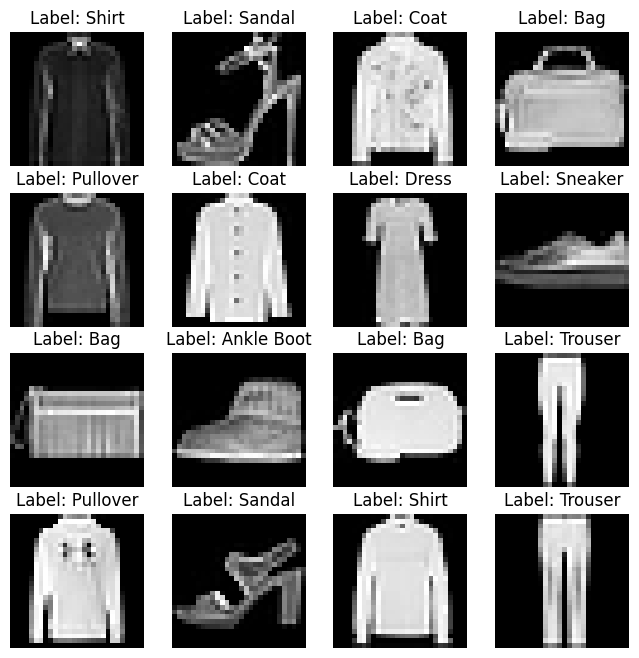

In [5]:
def display_random_images(images, labels, n_samples=16, color="gray"):
    random_indices = random.sample(range(len(images)), n_samples)

    plt.figure(figsize=(8, 8))
    for i, idx in enumerate(random_indices):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[idx], cmap=color)
        plt.title(f"Label: {labels_dict[labels[idx]]}")
        plt.axis("off")
    plt.show()


display_random_images(train_images, train_labels)

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype("float32") / 255
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype("float32") / 255

# Train models

## Base model

In [7]:
model = models.Sequential(
    [
        Input((28, 28, 1)),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation="relu"),

        Flatten(),
        Dense(512, activation="relu"),
        Dense(10, activation="softmax"),
    ],
    name="base_model",
)



model.summary()

Model: "base_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688,138 (2.63 MB)

 Trainable params: 688,138 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


early_stopping = callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)


history_base = model.fit(
    train_images,
    train_labels,
    epochs=40,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
)

Epoch 1/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7147 - loss: 0.7991 - val_accuracy: 0.8593 - val_loss: 0.3809
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8685 - loss: 0.3593 - val_accuracy: 0.8818 - val_loss: 0.3208
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8904 - loss: 0.2978 - val_accuracy: 0.8988 - val_loss: 0.2862
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9050 - loss: 0.2567 - val_accuracy: 0.9039 - val_loss: 0.2686
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9150 - loss: 0.2266 - val_accuracy: 0.9058 - val_loss: 0.2659
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9220 - loss: 0.2091 - val_accuracy: 0.9089 - val_loss: 0.2492
Epoch 7/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9322 - loss: 0.1830 - val_accuracy: 0.9065 - val_loss: 0.2533
Epoch 8/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9376 - loss: 0.1668 - val_accuracy: 0.

In [9]:
result = model.evaluate(test_images, test_labels)
print(f"Accuracy: {result[1]:.2%}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9084 - loss: 0.3488
Accuracy: 91.06%


### Visualization

In [10]:
def plot_training_history(history, model_name):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, c='blue', label='Training loss')
    plt.plot(epochs, val_loss_values, c='orange',label='Validation loss')
    plt.title(f'{model_name} Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], label='Training accuracy')
    plt.plot(epochs, history_dict['val_accuracy'], label='Validation accuracy')
    plt.title(f'{model_name} Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

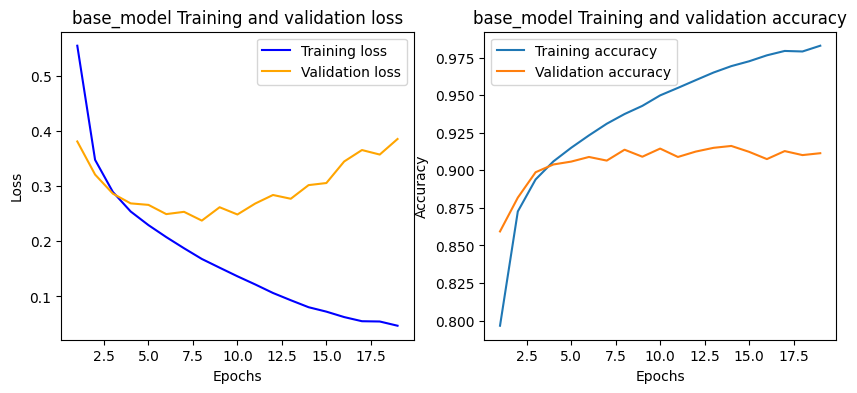

In [11]:
plot_training_history(history_base, model.name)

## Dropout model

In [12]:
model_dropout = models.Sequential(
    [
        Input((28, 28, 1)),
        Conv2D(32, (3, 3), activation="relu"),

        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation="relu"),

        Dropout(0.4),
        Flatten(),

        Dense(512, activation="relu"),
        Dropout(0.3),
        Dense(10, activation="softmax"),
    ],
    name="dropout_model",
)



model_dropout.summary()

Model: "dropout_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688,138 (2.63 MB)

 Trainable params: 688,138 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_dropout.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


early_stopping = callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)


history_dropout = model_dropout.fit(
    train_images,
    train_labels,
    epochs=40,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
)

Epoch 1/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6176 - loss: 1.0085 - val_accuracy: 0.8307 - val_loss: 0.4496
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8271 - loss: 0.4731 - val_accuracy: 0.8602 - val_loss: 0.3704
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8549 - loss: 0.3931 - val_accuracy: 0.8832 - val_loss: 0.3170
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8721 - loss: 0.3485 - val_accuracy: 0.8913 - val_loss: 0.2953
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8805 - loss: 0.3243 - val_accuracy: 0.8974 - val_loss: 0.2752
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8859 - loss: 0.3039 - val_accuracy: 0.8978 - val_loss: 0.2779
Epoch 7/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8933 - loss: 0.2895 - val_accuracy: 0.9041 - val_loss: 0.2579
Epoch 8/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8955 - loss: 0.2837 - val_accuracy: 0.

In [14]:
result = model_dropout.evaluate(test_images, test_labels)
print(f"Accuracy: {result[1]:.2%}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9190 - loss: 0.2344
Accuracy: 91.88%


### Visualization

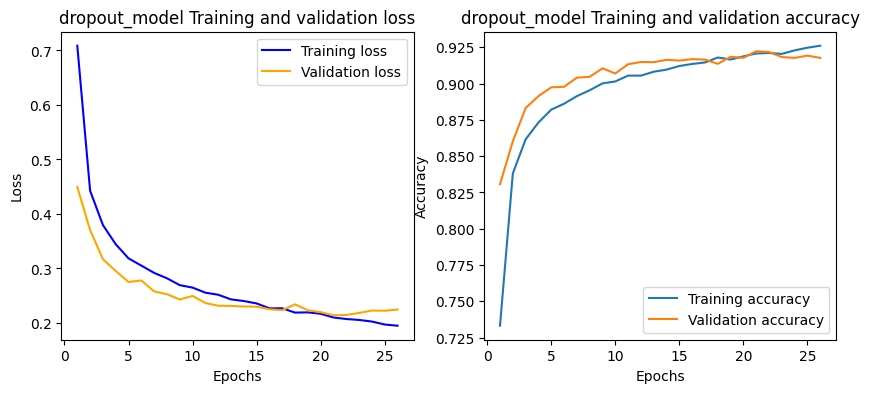

In [15]:
plot_training_history(history_dropout, model_dropout.name)

## Pre-training model

In [16]:
from keras.applications.vgg16 import VGG16

In [17]:
train_images_rgb = np.repeat(train_images, 3, axis=-1)
test_images_rgb = np.repeat(test_images, 3, axis=-1)

In [18]:
train_images_rgb.shape

(60000, 28, 28, 3)

In [19]:
train_images_rgb = tf.image.resize(train_images_rgb, (32, 32))
test_images_rgb = tf.image.resize(test_images_rgb, (32, 32))

In [20]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

model_vgg16 = models.Sequential([
    Input((32, 32, 3)),
    conv_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
], name='vgg16_model')

model_vgg16.summary()

Model: "vgg16_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
model_vgg16.compile(optimizer=keras.optimizers.Adam(5e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])


early_stopping = callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)


history_vgg16_part_1 = model_vgg16.fit(
    train_images_rgb,
    train_labels,
    epochs=40,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
)

Epoch 1/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.7041 - loss: 0.9362 - val_accuracy: 0.8239 - val_loss: 0.4902
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8375 - loss: 0.4572 - val_accuracy: 0.8407 - val_loss: 0.4393
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8541 - loss: 0.4088 - val_accuracy: 0.8484 - val_loss: 0.4180
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8618 - loss: 0.3828 - val_accuracy: 0.8543 - val_loss: 0.3995
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8677 - loss: 0.3623 - val_accuracy: 0.8524 - val_loss: 0.3989
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8734 - loss: 0.3463 - val_accuracy: 0.8602 - val_loss: 0.3814
Epoch 7/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8762 - loss: 0.3395 - val_accuracy: 0.8627 - val_loss: 0.3743
Epoch 8/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8789 - loss: 0.3271 - val_

In [22]:
result = model_vgg16.evaluate(test_images_rgb, test_labels)
print(f"Accuracy: {result[1]:.2%}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8763 - loss: 0.3520
Accuracy: 87.63%


### Visualization

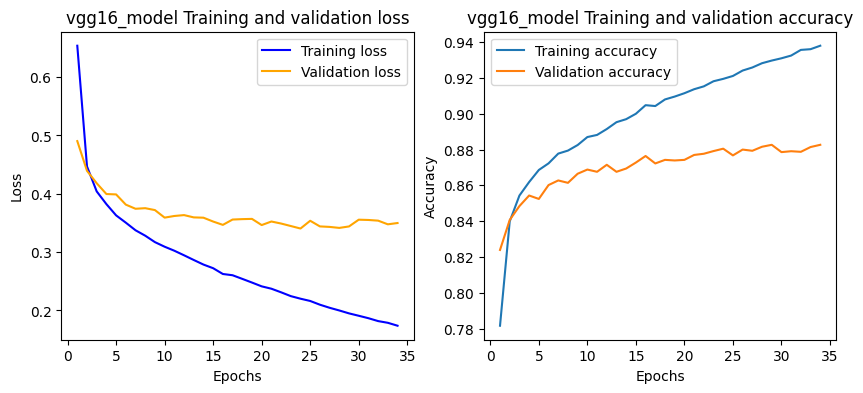

In [23]:
plot_training_history(history_vgg16_part_1, model_vgg16.name)

### Finetune

In [24]:
conv_base.trainable = True

for layer in conv_base.layers[:-4]:
    layer.trainable = False

model_vgg16.compile(optimizer=keras.optimizers.Adam(1e-5), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stopping = callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)

history_vgg16_part_2 = model_vgg16.fit(
    train_images_rgb,
    train_labels,
    epochs=40,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
)

Epoch 1/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9284 - loss: 0.1960 - val_accuracy: 0.8817 - val_loss: 0.3423
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9421 - loss: 0.1646 - val_accuracy: 0.8864 - val_loss: 0.3367
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9477 - loss: 0.1453 - val_accuracy: 0.8909 - val_loss: 0.3320
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9566 - loss: 0.1288 - val_accuracy: 0.8917 - val_loss: 0.3357
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9622 - loss: 0.1152 - val_accuracy: 0.8940 - val_loss: 0.3322
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9650 - loss: 0.1054 - val_accuracy: 0.8964 - val_loss: 0.3305
Epoch 7/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9673 - loss: 0.0985 - val_accuracy: 0.8981 - val_loss: 0.3319
Epoch 8/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9731 - loss: 0.0851 - 

In [25]:
result = model_vgg16.evaluate(test_images_rgb, test_labels)
print(f"Accuracy: {result[1]:.2%}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8979 - loss: 0.3970
Accuracy: 89.71%


### Visualization

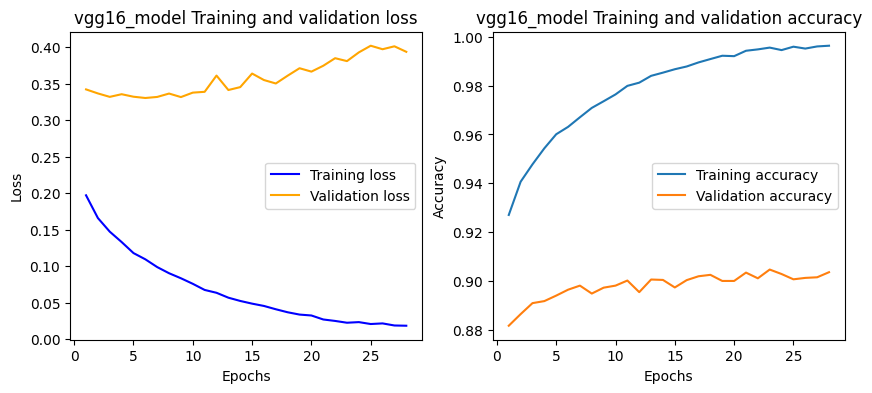

In [26]:
plot_training_history(history_vgg16_part_2, model_vgg16.name)